In [1]:
# Data Imports
import pandas as pd

In [2]:
# Plot imports
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
# For evaluating our ML results
from sklearn import metrics

In [5]:
data= pd.read_csv("../../Inputs/Social_Network_Ads.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
#summary statistics on the data
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
#columns names
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
# Preview
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
# Preview
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [11]:
# Create a set of dummy variables from the sex variable
df_sex = pd.get_dummies(data['Gender'])

In [12]:
df= pd.concat([data, df_sex], axis=1)

In [13]:
df.shape

(400, 7)

In [14]:
#apparently males, older and richer are more likely to purchase
df.groupby('Purchased').mean()

,User ID,Age,EstimatedSalary,Female,Male
Purchased,,,,,
0,1.569116e+07,32.793774,60544.747082,0.494163,0.505837
1,1.569222e+07,46.391608,86272.727273,0.538462,0.461538


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

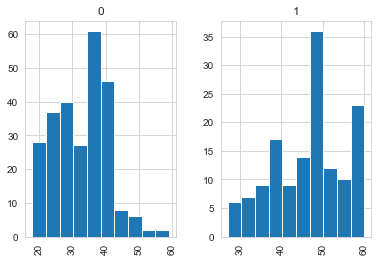

In [15]:
data.hist(column='Age', by='Purchased')

In [16]:
#drop user id and gender and male as we do not need them , axis=1 along the columns 
df.drop(df.columns[[0, 1,-1]], axis=1, inplace=True)

inplace : boolean, default False. Modify the DataFrame in place (do not create a new object)

The reason to drop male is to avoid multicollinearity.Multicollinearity occurs due to the dummy variables we created. 

In [17]:
#Set Y as Target class, Purchased
Y = df.Purchased

In [18]:
# Preview
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [19]:

#get the rest of the observations in the X vector
X=df.drop(['Purchased'], axis=1)


In [20]:
X

,Age,EstimatedSalary,Female
0,19,19000,0
1,35,20000,0
2,26,43000,1
3,27,57000,1
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,0
397,50,20000,1
398,36,33000,0


Split the data into training and testing data sets using SciKit Learn's built-in  train_test_split method setting a random state and test size.

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [22]:
logistic = LogisticRegression()

In [23]:

# Now fit the new model
logistic.fit(X_train, Y_train)

LogisticRegression()

In [24]:

# Predict the classes of the testing data set
class_predict = logistic.predict(X_test)

In [25]:
# Compare the predicted classes to the actual test classes
print ("METRIC SCORE: ", metrics.accuracy_score(Y_test, class_predict))

METRIC SCORE:  0.6


Not such a great metric. Maybe with inclusion of more predictors we could improve the fit. Check how to improve the fit.

In [26]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, class_predict).ravel()

In [27]:
print(tn, fp, fn, tp)

72 0 48 0


In [28]:
Y_test

398    0
125    0
328    1
339    1
172    0
      ..
91     0
322    0
248    0
186    0
395    1
Name: Purchased, Length: 120, dtype: int64

In [29]:
class_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])